<a href="https://www.kaggle.com/code/thirumani/shark-tank-us-data-analysis?scriptVersionId=125969326" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## <p style="background-color:#800080;color:white;font-size:24px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid #800080;">SharkTank US Exploratory Data Analysis (EDA)</p>
## Dataset https://www.kaggle.com/datasets/thirumani/shark-tank-us-dataset

In [1]:
from IPython.display import IFrame
import datetime
print("Notebook was last executed on:", datetime.date.today().strftime("%Y-%b-%d"))

Notebook was last executed on: 2023-Apr-16


In [2]:
# Source: Wikipedia
IFrame('https://upload.wikimedia.org/wikipedia/en/6/68/Shark_Tank_Logo.jpg', width=360, height=270)

## ⚒️ Importing Required Python Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import geopandas as gpd
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.renderers.default = 'notebook'

## ⏳ Check and import dataset

In [4]:
! ls -l /kaggle/input/shark-tank-us-dataset
shark_tank = pd.read_csv('/kaggle/input/shark-tank-us-dataset/Shark Tank US dataset.csv', encoding = "ISO-8859-1")

nRow, nCol = shark_tank.shape
print(f'\nThere are {nRow} rows and {nCol} columns in the dataset')

total 276
-rw-r--r-- 1 nobody nogroup 282096 Apr 16 05:30 'Shark Tank US dataset.csv'

There are 1263 rows and 50 columns in the dataset


## 💵 Exploratory Data Analysis (EDA)

In [5]:
shark_tank.head(5)

Season Number Season Start Season End  Episode Number  Pitch Number  \
0              1    09-Aug-09  05-Feb-10               1             1   
1              1    09-Aug-09  05-Feb-10               1             2   
2              1    09-Aug-09  05-Feb-10               1             3   
3              1    09-Aug-09  05-Feb-10               1             4   
4              1    09-Aug-09  05-Feb-10               1             5   

  Original Air Date              Startup Name           Industry  \
0         09-Aug-09            AvaTheElephant    Health/Wellness   
1         09-Aug-09        Mr.Tod'sPieFactory  Food and Beverage   
2         09-Aug-09                   Wispots  Business Services   
3         09-Aug-09  CollegeFoxesPackingBoxes     Lifestyle/Home   
4         09-Aug-09                  IonicEar      Software/Tech   

                              Business Description Pitchers Gender  \
0           Ava The Elephant - Baby and Child Care          Female   
1           Mr. Tod's Pie Factory - Specialty Food            Male   
2                      Wispots - Consumer Services            Male   
3  College Foxes Packing Boxes - Consumer Services            Male   
4                            Ionic Ear - Novelties            Male   

  Pitchers City Pitchers State Pitchers Average Age  \
0       Atlanta             GA                  NaN   
1      Somerset             NJ                  NaN   
2          Cary             NC                  NaN   
3         Tampa             FL                  NaN   
4      St. Paul             MN                  NaN   

            Entrepreneur Names                      Company Website  \
0              Tiffany Krumins       http://www.avatheelephant.com/   
1                   Tod Wilson                  http://whybake.com/   
2               Kevin Flannery              http://www.wispots.com/   
3  Nick Friedman, Omar Soliman  http://collegehunkshaulingjunk.com/   
4               Darrin Johnson                                  NaN   

   Multiple Entrepreneurs  US Viewership  Original Ask Amount  \
0                     0.0           4.15                50000   
1                     0.0           4.15               460000   
2                     0.0           4.15              1200000   
3                     0.0           4.15               250000   
4                     0.0           4.15              1000000   

   Original Offered Equity  Valuation Requested  Got Deal  Total Deal Amount  \
0                     15.0               333333         1            50000.0   
1                     10.0              4600000         1           460000.0   
2                     10.0             12000000         0                NaN   
3                     25.0              1000000         0                NaN   
4                     15.0              6666667         0                NaN   

   Total Deal Equity  Deal Valuation  Number of sharks in deal  \
0               55.0         90909.0                       1.0   
1               50.0        920000.0                       2.0   
2                NaN             NaN                       NaN   
3                NaN             NaN                       NaN   
4                NaN             NaN                       NaN   

   Investment Amount Per Shark  Equity Per Shark  Royalty Deal  Loan  \
0                      50000.0              55.0           NaN   NaN   
1                     230000.0              25.0           NaN   NaN   
2                          NaN               NaN           NaN   NaN   
3                          NaN               NaN           NaN   NaN   
4                          NaN               NaN           NaN   NaN   

   Barbara Corcoran Investment Amount  Barbara Corcoran Investment Equity  \
0                             50000.0                                55.0   
1                            230000.0                                25.0   
2                                 NaN

In [6]:
shark_tank.tail(10).T

1253  \
Season Number                                            14   
Season Start                                      23-Sep-22   
Season End                                              NaN   
Episode Number                                           17   
Pitch Number                                           1254   
Original Air Date                                 17-Mar-23   
Startup Name                                          Autio   
Industry                                      Software/Tech   
Business Description                Mobile audio travel app   
Pitchers Gender                                        Male   
Pitchers City                                           NaN   
Pitchers State                                          NaN   
Pitchers Average Age                                 Middle   
Entrepreneur Names                              Woody Sears   
Company Website                                         NaN   
Multiple Entrepreneurs                                  0.0   
US Viewership                                          3.51   
Original Ask Amount                                 1000000   
Original Offered Equity                                 5.0   
Valuation Requested                                20000000   
Got Deal                                                  0   
Total Deal Amount                                       NaN   
Total Deal Equity                                       NaN   
Deal Valuation                                          NaN   
Number of sharks in deal                                NaN   
Investment Amount Per Shark                             NaN   
Equity Per Shark                                        NaN   
Royalty Deal                                            NaN   
Loan                                                    NaN   
Barbara Corcoran Investment Amount                      NaN   
Barbara Corcoran Investment Equity                      NaN   
Mark Cuban Investment Amount                            NaN   
Mark Cuban Investment Equity                            NaN   
Lori Greiner Investment Amount                          NaN   
Lori Greiner Investment Equity                          NaN   
Robert Herjavec Investment Amount                       NaN   
Robert Herjavec Investment Equity                       NaN   
Daymond John Investment Amount                          NaN   
Daymond John Investment Equity                          NaN   
Kevin O Leary Investment Amount                         NaN   
Kevin O Leary Investment Equity                         NaN   
Guest Investment Amount                                 NaN   
Guest Investment Equity                                 NaN   
Guest Name                                              NaN   
Barbara Corcoran Present                                NaN   
Mark Cuban Present                                      NaN   
Lori Greiner Present                                    NaN   
Robert Herjavec Present                                 NaN   
Daymond John Present                                    NaN   
Kevin O Leary Present                                   NaN   

                                                    1254                1255  \
Season Number                                         14                  14   
Season Start                                   23-Sep-22           23-Sep-22   
Season End                                           NaN                 NaN   
Episode Number                                        18                  18   
Pitch Number                                        1255                1256   
Original Air Date                              31-Mar-23           31-Mar-23   
Startup Name                                  HappiFloss             Lavabox   
Industry                                 Uncertain/Other      Lifestyle/Home   
Business Description                Compostable flossers  Portable campfires   
Pitchers Gender                          

In [7]:
shark_tank['Season Number'] = shark_tank['Season Number'].astype(pd.Int32Dtype())
shark_tank['Episode Number'] = shark_tank['Episode Number'].astype(pd.Int32Dtype())
shark_tank['Pitch Number'] = shark_tank['Pitch Number'].astype(pd.Int32Dtype())

shark_tank['Startup Name'] = shark_tank['Startup Name'].astype(str)
shark_tank['Industry'] = shark_tank['Industry'].astype(str)
shark_tank['Business Description'] = shark_tank['Business Description'].astype(str)

shark_tank['Multiple Entrepreneurs'] = shark_tank['Multiple Entrepreneurs'].astype(pd.Int32Dtype())

In [8]:
shark_tank.sample(10).style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1px solid black", 'font-size': '10pt'})

In [9]:
shark_tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1263 entries, 0 to 1262
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Season Number                       1263 non-null   Int32  
 1   Season Start                        1263 non-null   object 
 2   Season End                          1187 non-null   object 
 3   Episode Number                      1263 non-null   Int32  
 4   Pitch Number                        1263 non-null   Int32  
 5   Original Air Date                   1263 non-null   object 
 6   Startup Name                        1263 non-null   object 
 7   Industry                            1263 non-null   object 
 8   Business Description                1263 non-null   object 
 9   Pitchers Gender                     1256 non-null   object 
 10  Pitchers City                       501 non-null    object 
 11  Pitchers State                      743 non

In [10]:
shark_tank.describe().T.round(2).style.background_gradient(cmap = 'Oranges')

In [11]:
# Unique values in each column
for col in shark_tank.columns:
    print("Number of unique values in", col, "-", shark_tank[col].nunique())

Number of unique values in Season Number - 14
Number of unique values in Season Start - 14
Number of unique values in Season End - 13
Number of unique values in Episode Number - 29
Number of unique values in Pitch Number - 1262
Number of unique values in Original Air Date - 304
Number of unique values in Startup Name - 1260
Number of unique values in Industry - 16
Number of unique values in Business Description - 1261
Number of unique values in Pitchers Gender - 3
Number of unique values in Pitchers City - 252
Number of unique values in Pitchers State - 46
Number of unique values in Pitchers Average Age - 3
Number of unique values in Entrepreneur Names - 749
Number of unique values in Company Website - 500
Number of unique values in Multiple Entrepreneurs - 2
Number of unique values in US Viewership - 217
Number of unique values in Original Ask Amount - 78
Number of unique values in Original Offered Equity - 45
Number of unique values in Valuation Requested - 172
Number of unique value

In [12]:
# Data set information
print(shark_tank['Season Number'].max(), "seasons \n")
print(shark_tank['Pitch Number'].max(), "startup companies came for pitching \n")

14 seasons 

1262 startup companies came for pitching 



In [13]:
# Season-wise number of episodes
pd.pivot_table(shark_tank, values='Episode Number', columns='Season Number', aggfunc='max')

Season Number    1  2   3   4   5   6   7   8   9  10  11  12  13  14
Episode Number  14  9  15  26  29  29  29  24  24  23  24  25  24  20

In [14]:
# There were 3 to 5 pitches, in a each episode
print(shark_tank[['Season Number','Episode Number']].value_counts().sort_values(ascending=True).unique())

[1 3 4 5]


In [15]:
# Types of industries, came for investments, in all seasons
tmp = shark_tank['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x="Industry", title="<b> Shark Tank USA - Industry wise startups</b>", template='simple_white', text=tmp, width=850, height=700)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show()

Male          699
Female        325
Mixed Team    232
Name: Pitchers Gender, dtype: int64 

Male          56%
Female        26%
Mixed Team    18%
Name: Pitchers Gender, dtype: object 



<AxesSubplot:title={'center':'Pitchers Gender wise percentage'}, ylabel='Pitchers Gender'>

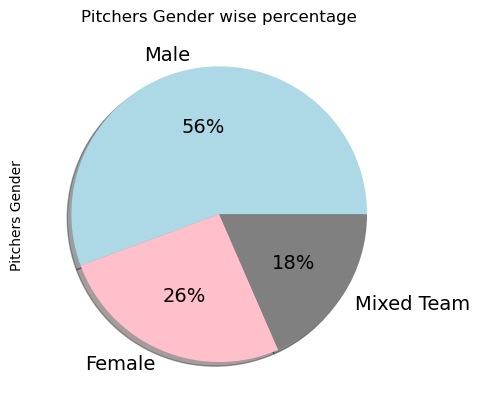

In [16]:
# Gender wise
print(shark_tank['Pitchers Gender'].value_counts(),"\n")

# In percentage
print(round(shark_tank['Pitchers Gender'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False),"\n")

plt.title("Pitchers Gender wise percentage")
shark_tank["Pitchers Gender"].value_counts().plot(kind='pie', autopct='%.0f%%', colors=["lightblue", "pink", "gray"], shadow=True, fontsize=14)

Middle    283
Young      24
Old         6
Name: Pitchers Average Age, dtype: int64 

Middle    90%
Young      8%
Old        2%
Name: Pitchers Average Age, dtype: object 



<AxesSubplot:title={'center':'Pitchers Age wise percentage'}, ylabel='Pitchers Average Age'>

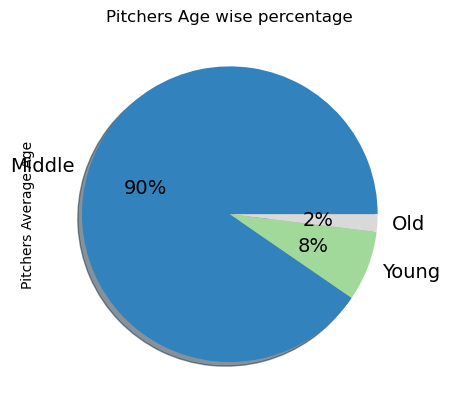

In [17]:
# Age wise
print(shark_tank['Pitchers Average Age'].value_counts(),"\n")

# In percentage
print(round(shark_tank['Pitchers Average Age'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False),"\n")

plt.title("Pitchers Age wise percentage")
shark_tank["Pitchers Average Age"].value_counts().plot(kind='pie', autopct='%.0f%%', cmap='tab20c', shadow=True, fontsize=14)

### 💹 60% companies received offers and 40% startups could not convince Sharks to invest

1    757
0    506
Name: Got Deal, dtype: int64 

1    60%
0    40%
Name: Got Deal, dtype: object


<AxesSubplot:ylabel='Got Deal'>

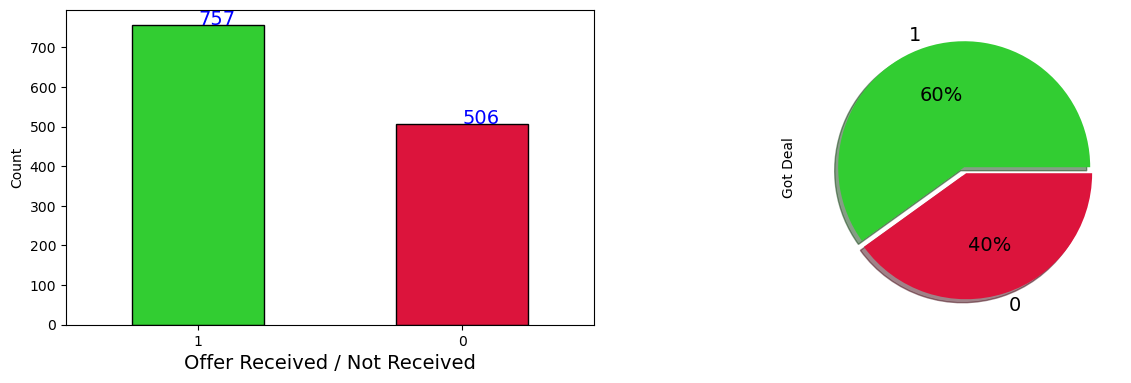

In [18]:
# Offers received
print(shark_tank['Got Deal'].value_counts(), "\n")
print(round(shark_tank['Got Deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15,9))
ax1 = plt.subplot(221)
shark_tank["Got Deal"].value_counts().plot(kind='bar', color=["limegreen","crimson"], ec="k")
plt.xlabel("Offer Received / Not Received", size=14)
plt.ylabel("Count")
plt.xticks(rotation=0)
for x,y in enumerate(shark_tank["Got Deal"].value_counts()):
    plt.annotate(y, (x,y), fontsize=14, color="blue")
    
ax2 = plt.subplot(222)
shark_tank["Got Deal"].value_counts().plot(kind='pie', autopct='%.0f%%', explode = (0,0.05), colors=["limegreen","crimson"], shadow=True, fontsize=14)

# 757 companies received offers & 506 startups could not convince #Sharks to invest.

Male          394
Female        207
Mixed Team    151
Name: Pitchers Gender, dtype: int64


<AxesSubplot:ylabel='Pitchers Gender'>

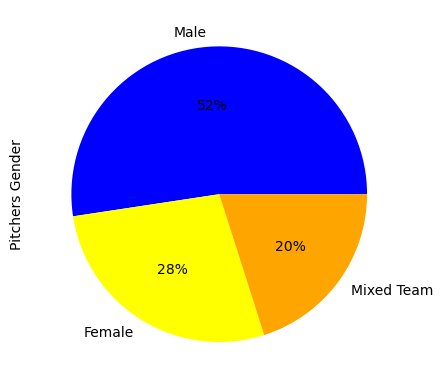

In [19]:
# Gender wise distribution, who received the offer
print(shark_tank[shark_tank['Got Deal']==1]['Pitchers Gender'].value_counts())
shark_tank[shark_tank['Got Deal']==1]['Pitchers Gender'].value_counts().sort_values(ascending=False).plot.pie(autopct='%.0f%%',colors=["blue", "yellow", "orange"])

Male          305
Female        118
Mixed Team     81
Name: Pitchers Gender, dtype: int64


<AxesSubplot:ylabel='Pitchers Gender'>

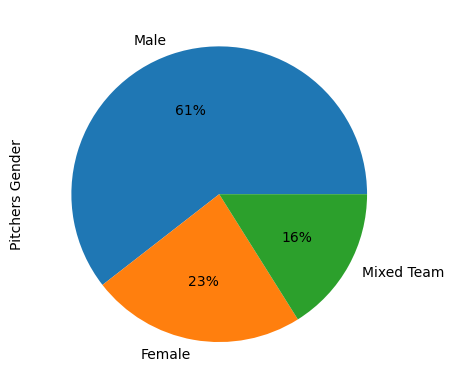

In [20]:
# Gender wise distribution, who could NOT receive the offer
print(shark_tank[shark_tank['Got Deal']==0]['Pitchers Gender'].value_counts())
shark_tank[shark_tank['Got Deal']==0]['Pitchers Gender'].value_counts().sort_values(ascending=False).plot.pie(autopct='%.0f%%')

## ❗ USA Shark Tank dataset Visualizations/infographics in Tableau Public —
### https://public.tableau.com/views/SharkTankUS/SharkTankUSStory_1

In [21]:
IFrame("https://public.tableau.com/views/SharkTankUS/SharkTankUSStory_1", width=1100, height=1100)

In [22]:
# Maximum amount requested
print("Maximum amount requested, by a pitcher -", format_currency(shark_tank['Original Ask Amount'].max(), 'USD', locale='en_US').replace(".00", ""))

Maximum amount requested, by a pitcher - $5,000,000


In [23]:
# Least amount requested
print("Least amount requested, by a pitcher -", format_currency(shark_tank['Original Ask Amount'].min(), 'USD', locale='en_US').replace(".00", ""))

Least amount requested, by a pitcher - $10,000


In [24]:
# Sum of investment amount asked, in Shark Tank America
print("Sum of investment amount asked, by all startup companies, in US Shark Tank -", format_currency(shark_tank['Original Ask Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))

Sum of investment amount asked, by all startup companies, in US Shark Tank - $359,216,000


In [25]:
# Amount invested by all sharks, in US SharkTank
print("Amount invested by all sharks, in Shark Tank US -", format_currency(shark_tank['Total Deal Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))

Amount invested by all sharks, in Shark Tank US - $224,213,166


In [26]:
# Sum of loan/debt amount, in American Shark Tank
print("Sum of loan/debt amount, given by all sharks, in American SharkTank -", format_currency(shark_tank['Loan'].sum(), 'USD', locale='en_US').replace(".00", ""))

Sum of loan/debt amount, given by all sharks, in American SharkTank - $21,937,500


In [27]:
# Top 15 investments, as per total investment/deal amount
print(shark_tank.groupby('Startup Name')['Total Deal Amount'].max().nlargest(15))

shark_tank['Total Deal Amount in M'] = shark_tank['Total Deal Amount']/1000000
tmpdf = shark_tank.sort_values('Total Deal Amount in M', ascending=False)[0:15]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Amount in M', color="Startup Name", title="Highest investment as per deal amount (in millions)", text=tmpdf['Total Deal Amount in M'].map(float).map(str))
fig.show()

Startup Name
AirCar                     5000000.0
MokiDoorstep               3000000.0
SynDaverLabs               3000000.0
Zipz                       2500000.0
DBestProducts              2350000.0
Fizzics                    2000000.0
TenThirtyOneProductions    2000000.0
Vengo                      2000000.0
RuggedManiac               1750000.0
BeyondSushi                1500000.0
Sworkit                    1500000.0
XCraft                     1500000.0
Trunkster                  1400000.0
HyConn                     1250000.0
Jackson'sHonest            1250000.0
Name: Total Deal Amount, dtype: float64


In [28]:
# Top 20 investments, as per total equity/shares percentage diluted
print(shark_tank.groupby('Startup Name')['Total Deal Equity'].max().nlargest(20))

tmpdf = shark_tank.sort_values('Total Deal Equity', ascending=False)[0:20]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Highest investment as per equity percentage", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show()

# 9 startups sold entire company (equity) to Sharks

Startup Name
ClassroomJams           100.0
CoolWraps               100.0
Evrewares               100.0
Hugo'sAmazingTape       100.0
HyConn                  100.0
MokiDoorstep            100.0
RokBlok                 100.0
TurboBaster             100.0
WineBalloon             100.0
LegacyShave              95.0
GrooveBook               80.0
RemyxxReKixxSneakers     80.0
Henry'sHumdingers        75.0
JeskaShoeCompany         70.0
Lightfilm                70.0
TheUROClub               70.0
ReaderestSpecsecure      65.0
TheLastLid               60.0
TreasureChestPets        60.0
CordaRoy's               58.0
Name: Total Deal Equity, dtype: float64


In [29]:
# Startups who got Debt/loan amount
print("Number of startups who got debt/loan amount", shark_tank['Loan'].count(),"\n")

shark_tank.loc[shark_tank['Loan'] >= 1][["Season Number","Startup Name","Original Ask Amount","Total Deal Amount","Total Deal Equity","Loan"]]

Number of startups who got debt/loan amount 51 



Season Number               Startup Name  Original Ask Amount  \
272               5           RapidRamenCooker               300000   
289               5                 BetterLife               400000   
291               5         PaparazziProposals               250000   
299               5                 Grace&Lace               175000   
300               5                       Yubo               150000   
433               6      Scratch&GrainBakingCo               150000   
459               6                   CocoJack               125000   
571               7                 BetterBack               750000   
580               7                      Vengo              2000000   
586               7                    Coolbox               500000   
621               8                     TekDry               500000   
622               8             NightRunner270               200000   
636               8                  StyleClub               500000   
640               8  Jack'sStands&Marketplaces                50000   
642               8                       Toor               500000   
647               8                    Inboard               750000   
651               8              SealedbySanta               150000   
670               8              DBestProducts               350000   
684               8      BlendtiqueWineCompany               250000   
686               8                   Rareform               300000   
703               8                Wine&Design               500000   
733               9                   WaiveCar               500000   
753               9                 EverlyWell              1000000   
754               9                       Mush               300000   
759               9                    Frywall               100000   
791               9               GunnarOptiks               750000   
845              10           MakeupJunkieBags               200000   
899              11                BoostOxygen              1000000   
924              11                      Outer               750000   
931              11                 Flexscreen               800000   
955              11                     Bohana               200000   
956              11                       Boho               300000   
959              11                      Goumi              1000000   
974              11               MuralPainter               300000   
1023             12                    Electra               350000   
1027             12               SliceofSauce               200000   
1029             12                  LunaMagic               200000   
1031             12                     Quevos               200000   
1045             12               ByootCompany                50000   
1059             12                     NuMilk              1000000   
1062             12                 BunchBikes               250000   
1085             12                FloatNGrill               200000   
1121             13                 TheRealElf               125000   
1150             13                    Ade+Ayo               175000   
1170             13                 Browndages                75000   
1172             13                     Plunge              1200000   
1177             13                   Pricklee               200000   
1208             14                 Collars&Co               300000   
1256             14                      Bleni               250000   
1257             14         TheIceCreamCanteen               100000   
1260             14                     Cincha               200000   

      Total Deal Amount  Total Deal Equity       Loan  
272            150000.0              15.00   150000.0  
289            400000.0              17.00   400000.0  
291             50000.0              33.00   200000.0  
299             87500.0              10.00    87500.0  
300            150000.0          

In [30]:
# Startups who gave Royalty/Advisory shares
print("Number of startups who gave Royalty", shark_tank['Royalty Deal'].count(),"\n")

shark_tank.loc[shark_tank['Royalty Deal'] == 1][["Season Number","Startup Name","Original Ask Amount","Total Deal Amount","Total Deal Equity"]]

Number of startups who gave Royalty 72 



Season Number             Startup Name  Original Ask Amount  \
6                 1            ClassroomJams               250000   
10                1              TurboBaster                35000   
26                1              ElementBars               150000   
69                2  FirstDefenseNasalScreen               500000   
72                2          ModMomFurniture                90000   
...             ...                      ...                  ...   
1223             14                JicaFoods               300000   
1228             14               WildWonder               500000   
1229             14            CabinetHealth               500000   
1243             14       BigMouthToothbrush               150000   
1258             14             PartingStone               400000   

      Total Deal Amount  Total Deal Equity  
6              250000.0              100.0  
10              35000.0              100.0  
26             150000.0               30.0  
69             750000.0               30.0  
72              90000.0               33.0  
...                 ...                ...  
1223           300000.0                6.0  
1228           500000.0                6.0  
1229           500000.0                7.0  
1243           150000.0               20.0  
1258           400000.0               10.0  

[72 rows x 5 columns]

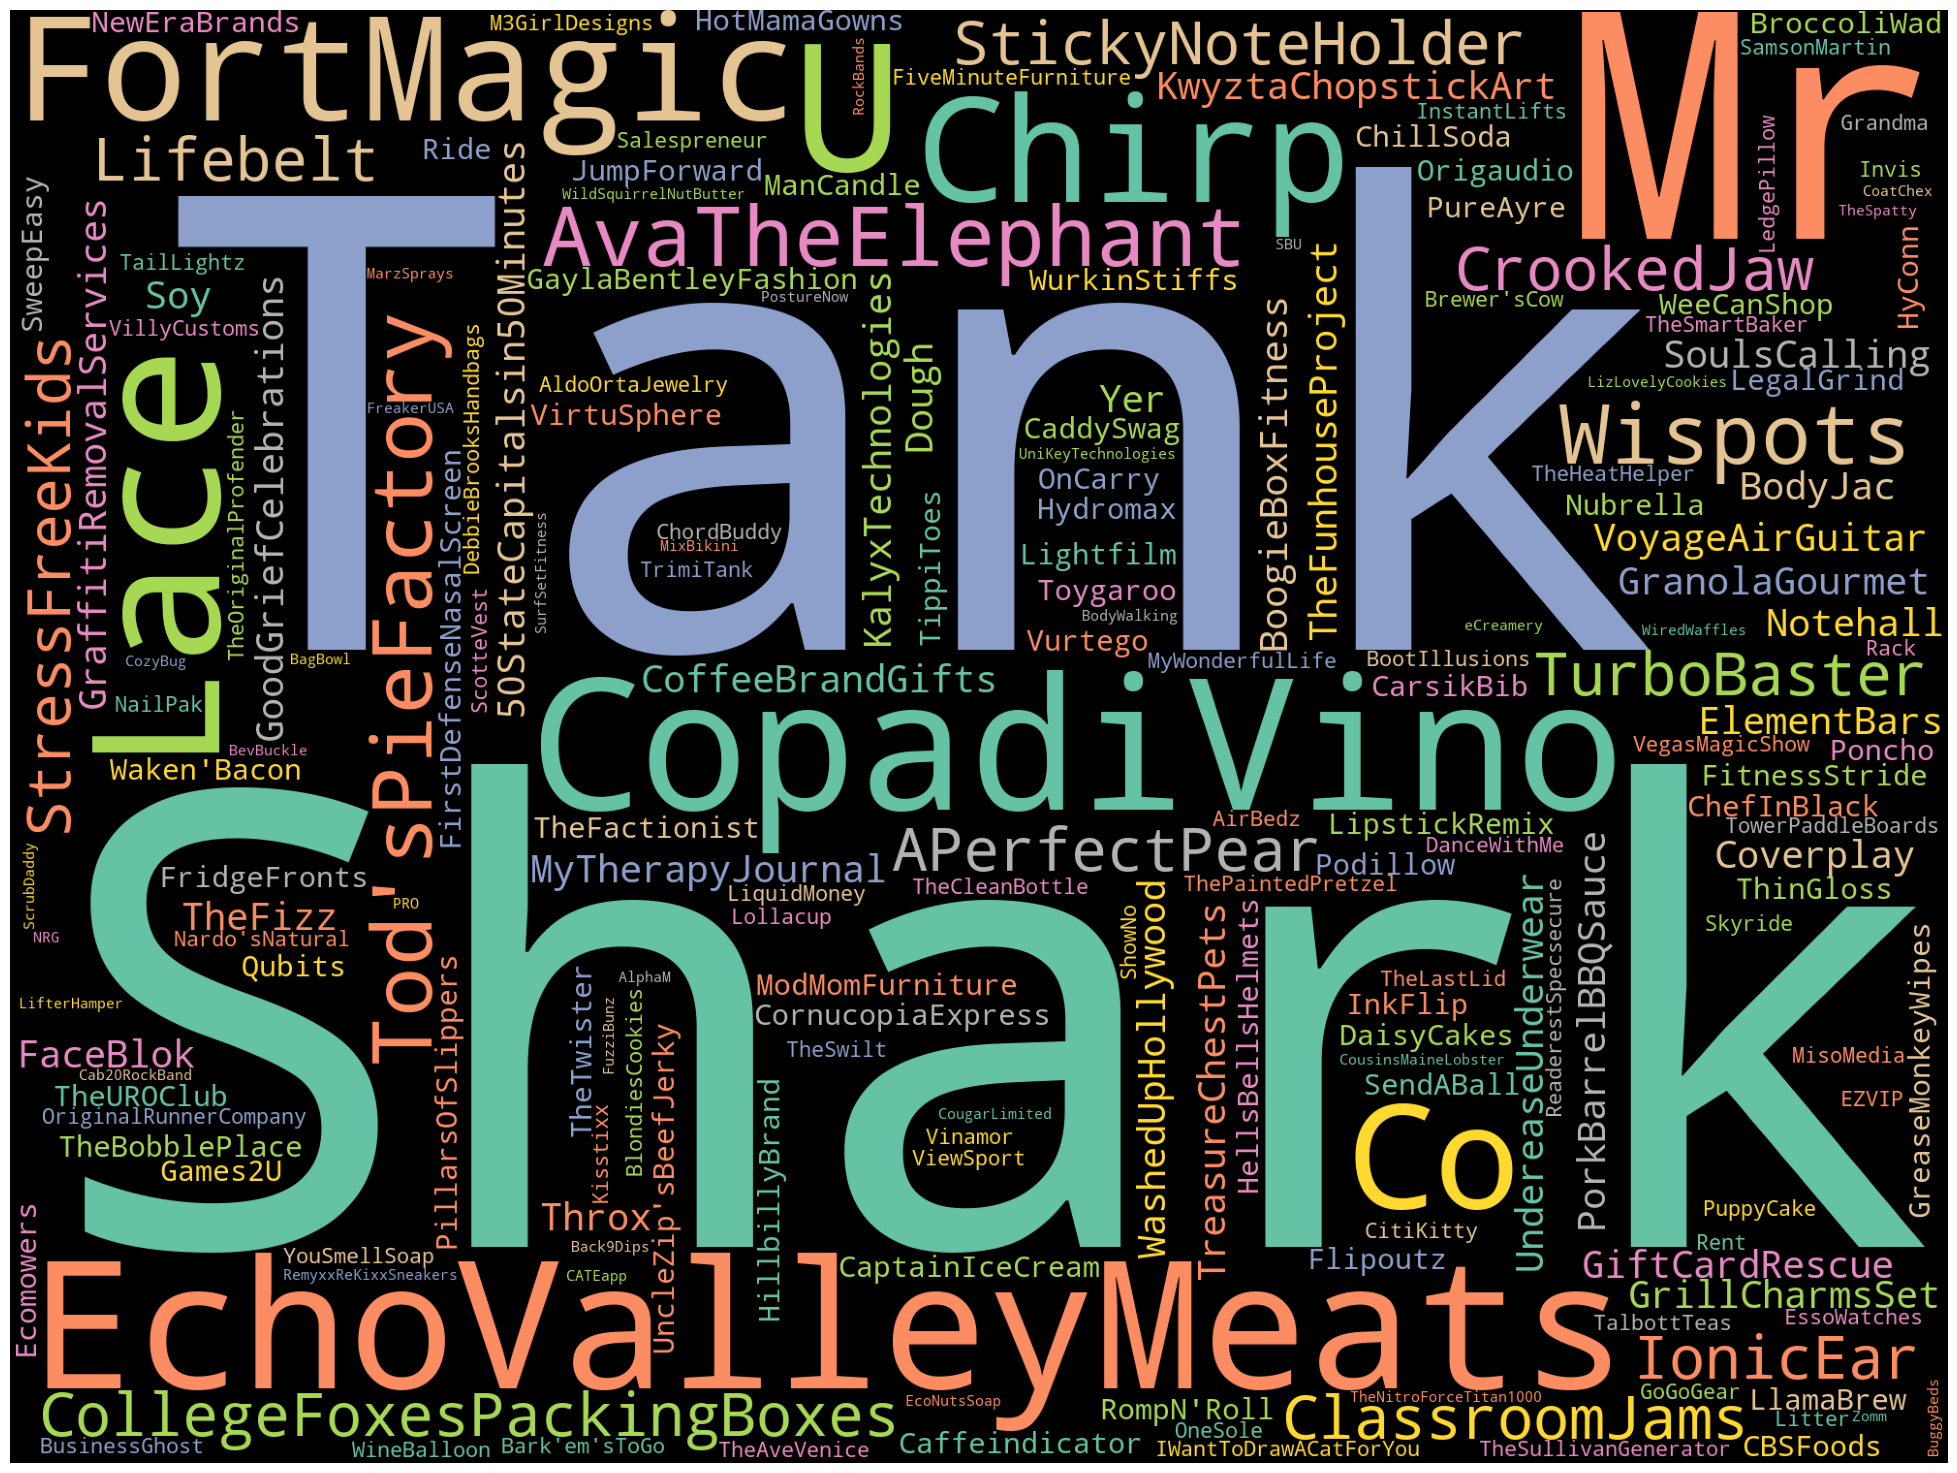

In [31]:
# Word cloud based on Startup Names
text = " Shark Tank ".join(cat for cat in shark_tank['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='black', colormap='Set2', collocations=False, random_state=2023).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 💰 Which shark invested most ?

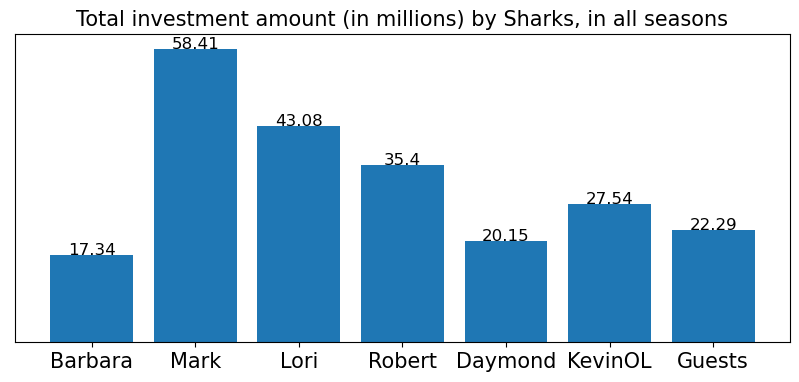

In [32]:
# Amount Invested by sharks
Amount = [(shark_tank['Barbara Corcoran Investment Amount']/1000000).sum(), (shark_tank['Mark Cuban Investment Amount']/1000000).sum(), (shark_tank['Lori Greiner Investment Amount']/1000000).sum(), (shark_tank['Robert Herjavec Investment Amount']/1000000).sum(),
    (shark_tank['Daymond John Investment Amount']/1000000).sum(), (shark_tank['Kevin O Leary Investment Amount']/1000000).sum(), (shark_tank['Guest Investment Amount']/1000000).sum()]
name=['Barbara','Mark','Lori','Robert','Daymond','KevinOL','Guests']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'])
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y=d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total investment amount (in millions) by Sharks, in all seasons", fontsize=15)
plt.show()

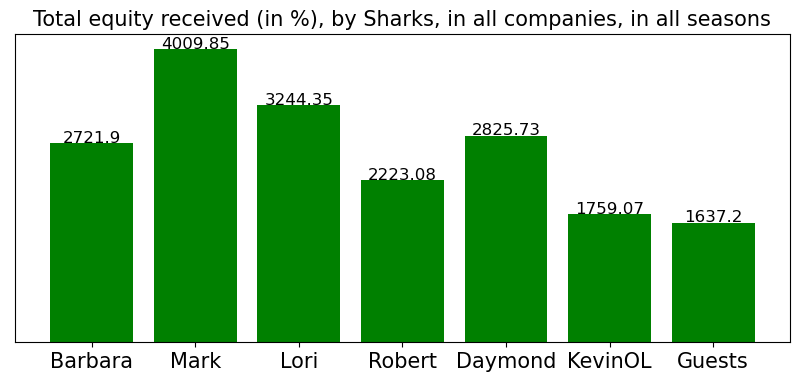

In [33]:
# Equity received by sharks
Equity = [shark_tank['Barbara Corcoran Investment Equity'].sum(), shark_tank['Mark Cuban Investment Equity'].sum(), shark_tank['Lori Greiner Investment Equity'].sum(), shark_tank['Robert Herjavec Investment Equity'].sum(),
    shark_tank['Daymond John Investment Equity'].sum(), shark_tank['Kevin O Leary Investment Equity'].sum(), shark_tank['Guest Investment Equity'].sum()]
name=['Barbara','Mark','Lori','Robert','Daymond','KevinOL','Guests']
df = {'Name':name, 'Total Equity':Equity}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Equity'], color='g')
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Equity):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total equity received (in %), by Sharks, in all companies, in all seasons", fontsize=15)
plt.show()

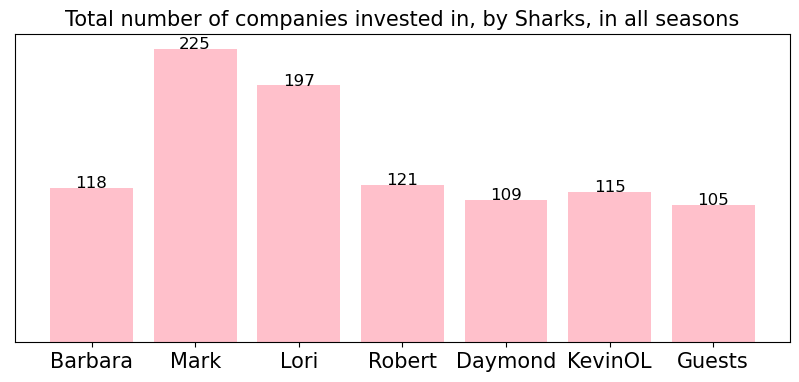

In [34]:
# Number of companies invested
Amount = [(shark_tank['Barbara Corcoran Investment Amount']).count(), (shark_tank['Mark Cuban Investment Amount']).count(), (shark_tank['Lori Greiner Investment Amount']).count(), (shark_tank['Robert Herjavec Investment Amount']).count(),
    (shark_tank['Daymond John Investment Amount']).count(), (shark_tank['Kevin O Leary Investment Amount']).count(), (shark_tank['Guest Investment Amount']).count()]
name=['Barbara','Mark','Lori','Robert','Daymond','KevinOL','Guests']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'], color='pink')
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y=d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total number of companies invested in, by Sharks, in all seasons", fontsize=15)
plt.show()

In [35]:
# Top 5, guests sharks who invested in most number of companies
shark_tank.groupby('Guest Name').size().nlargest(5)

Guest Name
Daniel Lubetzky    15
Alex Rodriguez      8
Chris Sacca         8
Rohan Oza           8
Emma Grede          7
dtype: int64

In [36]:
# Investment amount by guests, in Millions
round(shark_tank.groupby(["Guest Name"])["Guest Investment Amount"].sum().sort_values(ascending=False)/1000000,2)

Guest Name
Daniel Lubetzky      4.47
Rohan Oza            3.58
Chris Sacca          1.57
Matt Higgins         1.52
Alex Rodriguez       1.24
Kendra Scott         1.10
Emma Grede           1.08
Tony Xu              0.88
Peter Jones          0.80
Sara Blakely         0.70
Kevin Hart           0.65
Kevin Harrington     0.51
Jamie Siminoff       0.50
Maria Sharapova      0.45
Charles Barkley      0.38
Richard Branson      0.36
Gwyneth Paltrow      0.32
Daniel Lubetzsky     0.25
Anne Wojcicki        0.25
Nirav Tolia          0.22
Katrina Lake         0.20
Blake Mycoskie       0.20
Ashton Kutcher       0.20
Troy Carter          0.20
John Paul DeJoria    0.15
Nick Woodman         0.12
Bethenny Frankel     0.12
Alli Webb            0.09
Nirv Tolia           0.08
Jeff Foxworthy       0.05
Steve Tisch          0.05
Name: Guest Investment Amount, dtype: float64

## 🔎 Shark Tank India Dataset https://www.kaggle.com/datasets/thirumani/shark-tank-india

## 🔥Barbara Corcoran's Investments


Total investments by Barbara Corcoran 118
Investment amount by Barbara Corcoran $17,340,000
Equity received by Barbara Corcoran 2721.9 % in different companies

Company details:
---------------------------------------------------------------------------
               Startup Name                Industry  Barbara Corcoran Investment Amount
             AvaTheElephant         Health/Wellness                             50000.0
         Mr.Tod'sPieFactory       Food and Beverage                            230000.0
              ClassroomJams      Children/Education                             50000.0
             StressFreeKids      Children/Education                            250000.0
                  Coverplay      Children/Education                             35000.0
                    BodyJac Fitness/Sports/Outdoors                            180000.0
         PorkBarrelBBQSauce       Food and Beverage                             50000.0
          TreasureChestPets            Pet

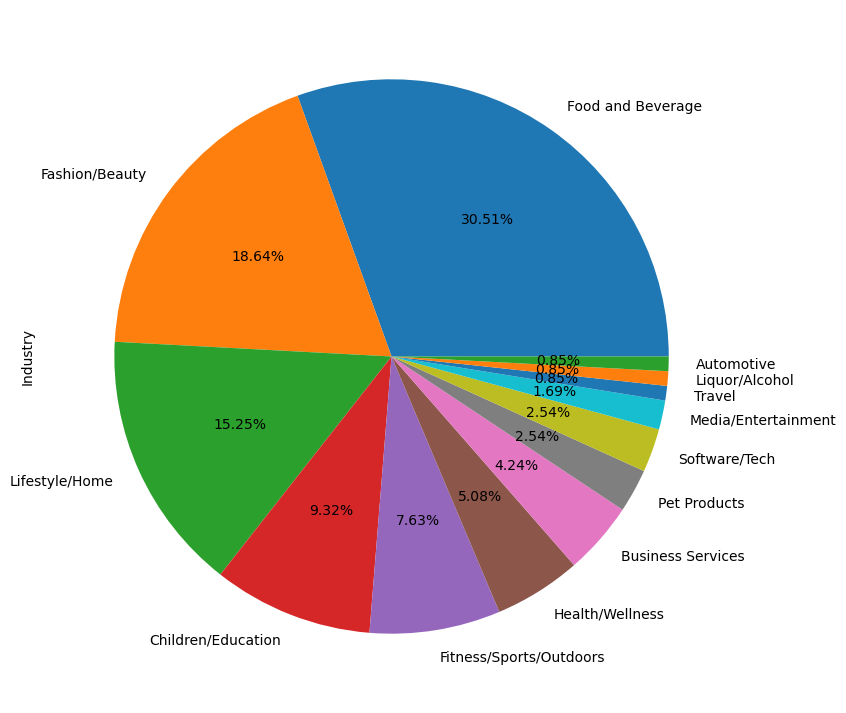

In [37]:
print("Total investments by Barbara Corcoran", shark_tank[shark_tank['Barbara Corcoran Investment Amount']>0][['Barbara Corcoran Investment Amount']].count().to_string()[-3:])
print("Investment amount by Barbara Corcoran", format_currency(shark_tank['Barbara Corcoran Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Barbara Corcoran", round(shark_tank['Barbara Corcoran Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Barbara Corcoran Investment Amount']>0][["Startup Name","Industry","Barbara Corcoran Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nBarbara Corcoran industry wise investments\n")
print(shark_tank[shark_tank['Barbara Corcoran Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Barbara Corcoran Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Barbara Corcoran Investment Amount']>0] [["Startup Name","Barbara Corcoran Investment Amount","Barbara Corcoran Investment Equity"]].sort_values(by="Barbara Corcoran Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Barbara Corcoran Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## 🎇 Mark Cuban's Investments

Total investments by Mark Cuban 225
Investment amount by Mark Cuban $58,409,333.33
Equity received by Mark Cuban 4009.85 % in different companies

Company details:
---------------------------------------------------------------------------
             Startup Name                Industry  Mark Cuban Investment Amount
            ClassroomJams      Children/Education                  5.000000e+04
                TippiToes Fitness/Sports/Outdoors                  5.000000e+04
                 Toygaroo      Children/Education                  1.000000e+05
  FirstDefenseNasalScreen         Health/Wellness                  2.500000e+05
                   HyConn         Uncertain/Other                  1.250000e+06
                    EZVIP     Media/Entertainment                  7.500000e+04
           TheCleanBottle       Food and Beverage                  6.000000e+04
    IWantToDrawACatForYou           Software/Tech                  2.500000e+04
              WineBalloon       Food and

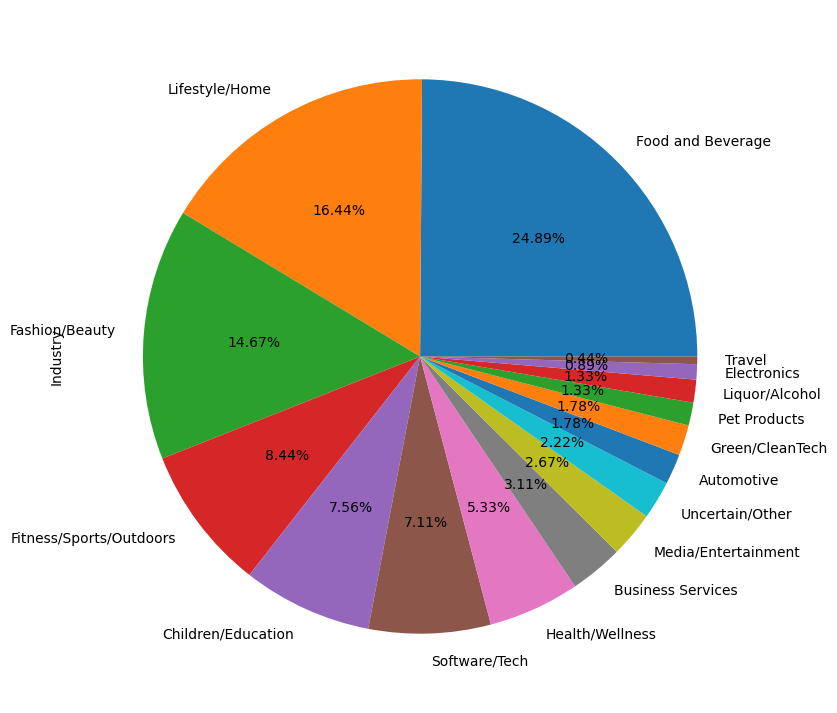

In [38]:
print("Total investments by Mark Cuban", shark_tank[shark_tank['Mark Cuban Investment Amount']>0][['Mark Cuban Investment Amount']].count().to_string()[-3:])
print("Investment amount by Mark Cuban", format_currency(shark_tank['Mark Cuban Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Mark Cuban", round(shark_tank['Mark Cuban Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Mark Cuban Investment Amount']>0][["Startup Name","Industry","Mark Cuban Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nMark Cuban industry wise investments\n")
print(shark_tank[shark_tank['Mark Cuban Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Mark Cuban Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Mark Cuban Investment Amount']>0] [["Startup Name","Mark Cuban Investment Amount","Mark Cuban Investment Equity"]].sort_values(by="Mark Cuban Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Mark Cuban Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## ✳️ Lori Greiner's Investments

Total investments by Lori Greiner 197
Investment amount by Lori Greiner $43,078,333.33
Equity received by Lori Greiner 3244.35 % in different companies

Company details:
---------------------------------------------------------------------------
          Startup Name                Industry  Lori Greiner Investment Amount
                ShowNo          Fashion/Beauty                    7.500000e+04
         M3GirlDesigns          Fashion/Beauty                    1.000000e+05
   ReaderestSpecsecure          Lifestyle/Home                    1.500000e+05
               NailPak          Fashion/Beauty                    5.000000e+04
               BagBowl          Lifestyle/Home                    4.000000e+04
             Back9Dips       Food and Beverage                    7.500000e+04
            MarzSprays         Health/Wellness                    2.000000e+05
            ScrubDaddy          Lifestyle/Home                    2.000000e+05
          TheCoolWazoo      Children/Educat

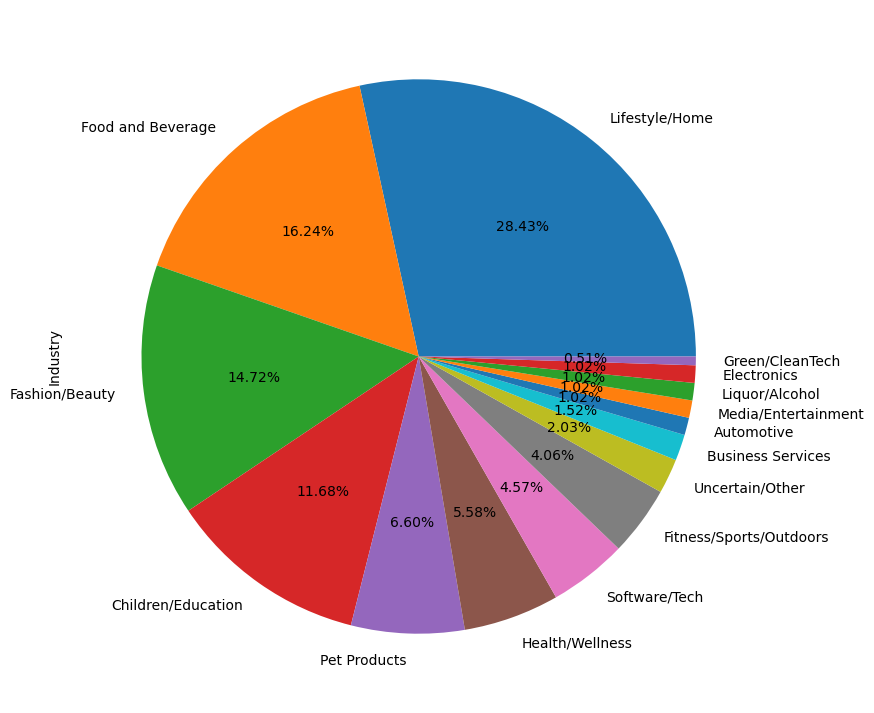

In [39]:
print("Total investments by Lori Greiner", shark_tank[shark_tank['Lori Greiner Investment Amount']>0][['Lori Greiner Investment Amount']].count().to_string()[-3:])
print("Investment amount by Lori Greiner", format_currency(shark_tank['Lori Greiner Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Lori Greiner", round(shark_tank['Lori Greiner Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Lori Greiner Investment Amount']>0][["Startup Name","Industry","Lori Greiner Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nLori Greiner industry wise investments\n")
print(shark_tank[shark_tank['Lori Greiner Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Lori Greiner Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Lori Greiner Investment Amount']>0] [["Startup Name","Lori Greiner Investment Amount","Lori Greiner Investment Equity"]].sort_values(by="Lori Greiner Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Lori Greiner Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## 🚀 Robert Herjavec's Investments

Total investments by Robert Herjavec 121
Investment amount by Robert Herjavec $35,397,332.67
Equity received by Robert Herjavec 2223.08 % in different companies

Company details:
---------------------------------------------------------------------------
           Startup Name                Industry  Robert Herjavec Investment Amount
           APerfectPear       Food and Beverage                       2.500000e+05
          ClassroomJams      Children/Education                       5.000000e+04
         GiftCardRescue           Software/Tech                       1.000000e+05
       MyTherapyJournal         Health/Wellness                       4.000000e+04
          Soy-Yer-Dough       Food and Beverage                       1.000000e+05
         GrillCharmsSet          Fashion/Beauty                       5.000000e+04
            JumpForward      Children/Education                       3.000000e+05
      GreaseMonkeyWipes          Lifestyle/Home                       2.000000e+0

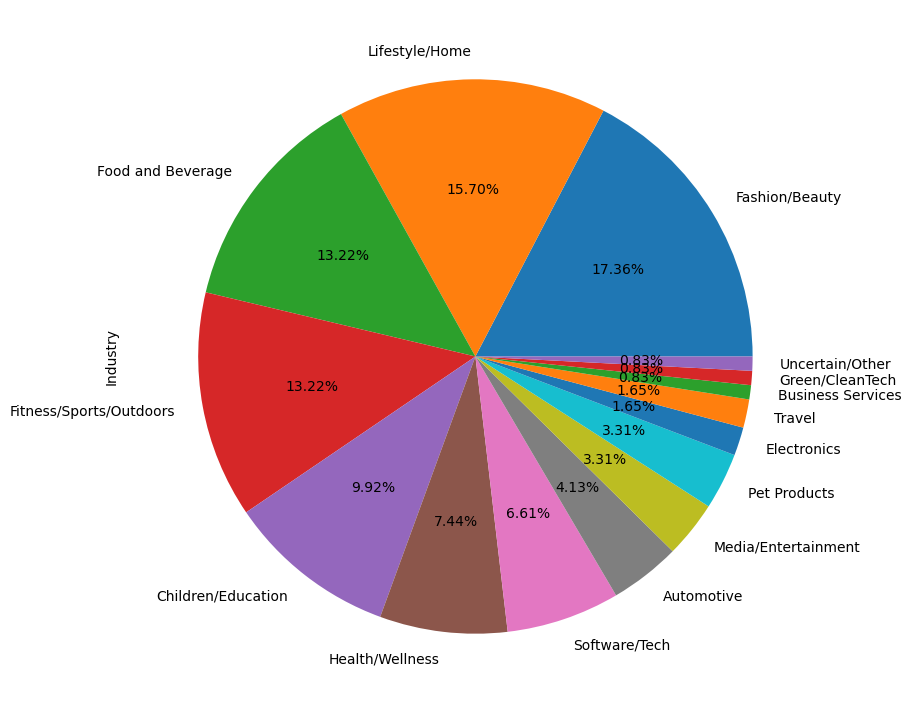

In [40]:
print("Total investments by Robert Herjavec", shark_tank[shark_tank['Robert Herjavec Investment Amount']>0][['Robert Herjavec Investment Amount']].count().to_string()[-3:])
print("Investment amount by Robert Herjavec", format_currency(shark_tank['Robert Herjavec Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Robert Herjavec", round(shark_tank['Robert Herjavec Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Robert Herjavec Investment Amount']>0][["Startup Name","Industry","Robert Herjavec Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nRobert Herjavec industry wise investments\n")
print(shark_tank[shark_tank['Robert Herjavec Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Robert Herjavec Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Robert Herjavec Investment Amount']>0] [["Startup Name","Robert Herjavec Investment Amount","Robert Herjavec Investment Equity"]].sort_values(by="Robert Herjavec Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Robert Herjavec Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## 🎾 Daymond John's Investments

Total investments by Daymond John 109
Investment amount by Daymond John $20,154,833.33
Equity received by Daymond John 2825.73 % in different companies

Company details:
---------------------------------------------------------------------------
               Startup Name                Industry  Daymond John Investment Amount
         Mr.Tod'sPieFactory       Food and Beverage                      230000.000
              ClassroomJams      Children/Education                       50000.000
              Soy-Yer-Dough       Food and Beverage                      100000.000
          TreasureChestPets            Pet Products                       50000.000
        GaylaBentleyFashion          Fashion/Beauty                      125000.000
          HellsBellsHelmets Fitness/Sports/Outdoors                      500000.000
              LipstickRemix          Fashion/Beauty                       52500.000
                   Nubrella          Fashion/Beauty                      200000.00

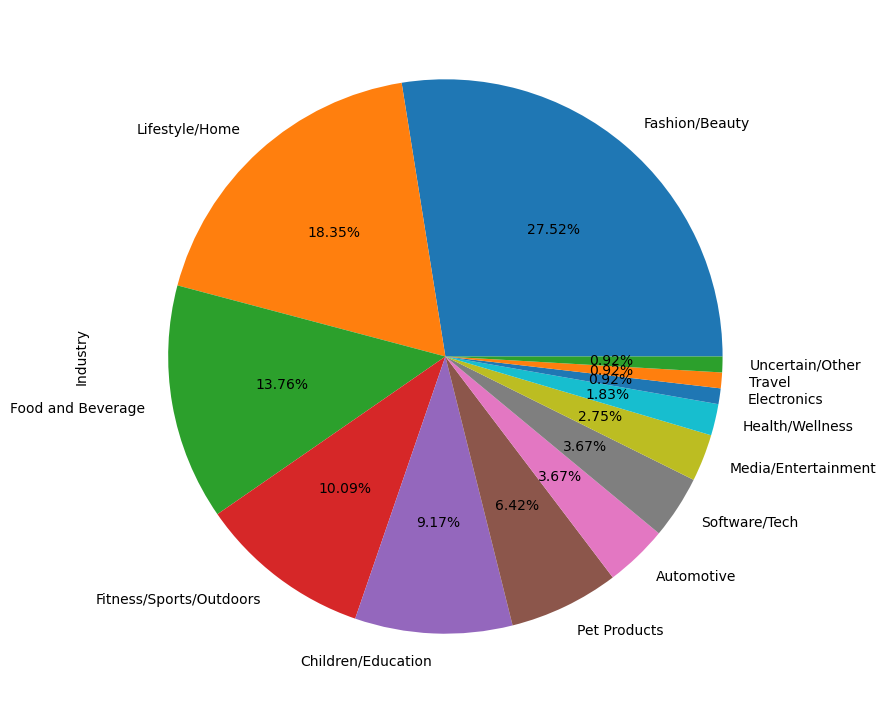

In [41]:
print("Total investments by Daymond John", shark_tank[shark_tank['Daymond John Investment Amount']>0][['Daymond John Investment Amount']].count().to_string()[-3:])
print("Investment amount by Daymond John", format_currency(shark_tank['Daymond John Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Daymond John", round(shark_tank['Daymond John Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Daymond John Investment Amount']>0][["Startup Name","Industry","Daymond John Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nDaymond John industry wise investments\n")
print(shark_tank[shark_tank['Daymond John Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Daymond John Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Daymond John Investment Amount']>0] [["Startup Name","Daymond John Investment Amount","Daymond John Investment Equity"]].sort_values(by="Daymond John Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Daymond John Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## ⭐ Kevin O Leary's Investments

Total investments by Kevin O Leary 115
Investment amount by Kevin O Leary $27,542,500
Equity received by Kevin O Leary 1759.07 % in different companies

Company details:
---------------------------------------------------------------------------
          Startup Name                Industry  Kevin O Leary Investment Amount
          APerfectPear       Food and Beverage                     2.500000e+05
         ClassroomJams      Children/Education                     5.000000e+04
        GiftCardRescue           Software/Tech                     1.000000e+05
      MyTherapyJournal         Health/Wellness                     4.000000e+04
         Soy-Yer-Dough       Food and Beverage                     1.000000e+05
           JumpForward      Children/Education                     3.000000e+05
              Toygaroo      Children/Education                     1.000000e+05
          FridgeFronts          Lifestyle/Home                     5.000000e+04
           TalbottTeas       Food 

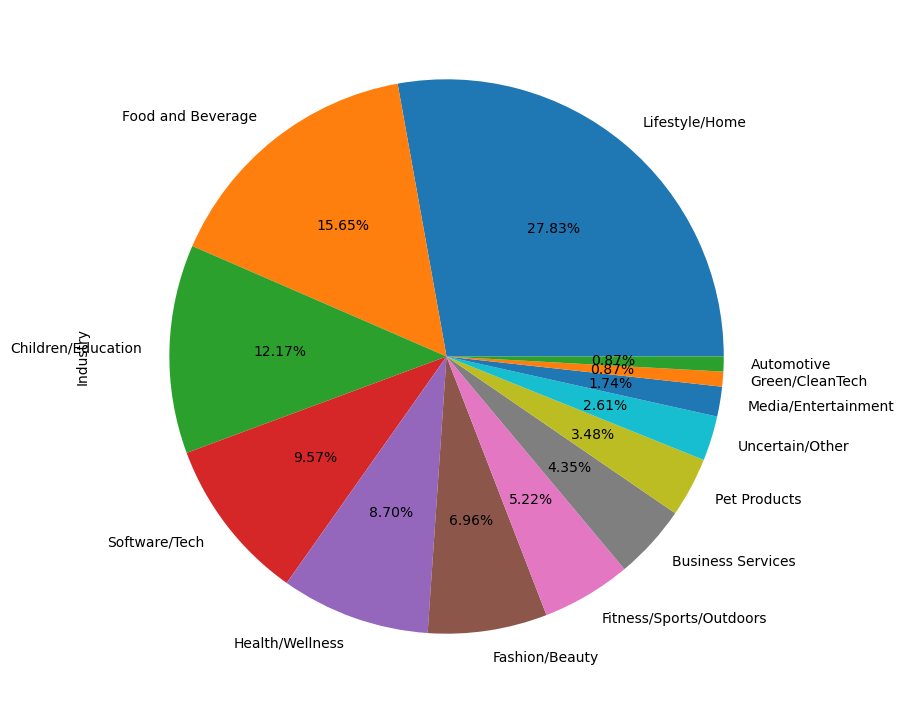

In [42]:
print("Total investments by Kevin O Leary", shark_tank[shark_tank['Kevin O Leary Investment Amount']>0][['Kevin O Leary Investment Amount']].count().to_string()[-3:])
print("Investment amount by Kevin O Leary", format_currency(shark_tank['Kevin O Leary Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Kevin O Leary", round(shark_tank['Kevin O Leary Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Kevin O Leary Investment Amount']>0][["Startup Name","Industry","Kevin O Leary Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nKevin O Leary industry wise investments\n")
print(shark_tank[shark_tank['Kevin O Leary Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Kevin O Leary Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Kevin O Leary Investment Amount']>0] [["Startup Name","Kevin O Leary Investment Amount","Kevin O Leary Investment Equity"]].sort_values(by="Kevin O Leary Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Kevin O Leary Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## 🎆 All Guest's Investments

Total investments by all Guests 05
Investment amount by all Guests $22,290,833.33
Equity received by all Guests 1637.2 % in different companies

Company details:
--------------------------------------------------------------------------------------------
             Startup Name                Industry  Guest Investment Amount        Guest Name
              TurboBaster       Food and Beverage             3.500000e+04  Kevin Harrington
              ElementBars Fitness/Sports/Outdoors             1.500000e+05  Kevin Harrington
               TheUROClub Fitness/Sports/Outdoors             2.500000e+04  Kevin Harrington
           Caffeindicator       Food and Beverage             2.000000e+05  Kevin Harrington
                 Hydromax Fitness/Sports/Outdoors             5.000000e+04    Jeff Foxworthy
                CitiKitty            Pet Products             1.000000e+05  Kevin Harrington
               Tree-T-Pee         Green/CleanTech             1.500000e+05 John Paul DeJoria
 

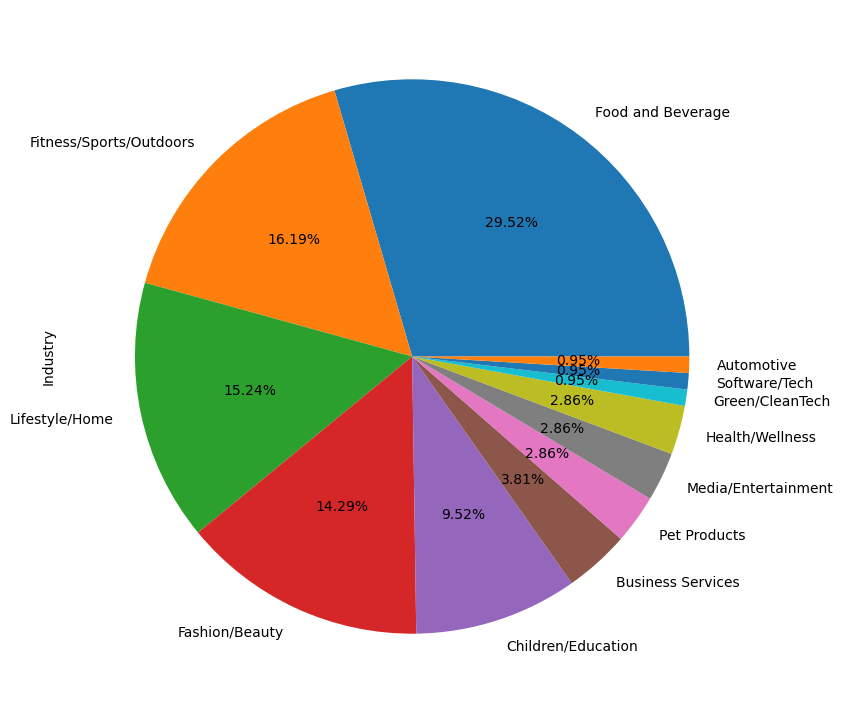

In [43]:
print("Total investments by all Guests", shark_tank[shark_tank['Guest Investment Amount']>0][['Guest Investment Amount']].count().to_string()[-2:])
print("Investment amount by all Guests", format_currency(shark_tank['Guest Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by all Guests", round(shark_tank['Guest Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*92)
print(shark_tank.loc[shark_tank['Guest Investment Amount']>0][["Startup Name","Industry","Guest Investment Amount","Guest Name"]].to_string(index=False))
print('-'*92)

print("\nAll Guests industry wise investments\n")
print(shark_tank[shark_tank['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Guest Investment Amount']>0] [["Startup Name","Guest Investment Amount","Guest Investment Equity"]].sort_values(by="Guest Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Guest Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

1.0    562
2.0    170
3.0     17
5.0      5
4.0      3
Name: Number of sharks in deal, dtype: int64 

1.0    74%
2.0    22%
3.0     2%
5.0     1%
4.0     0%
Name: Number of sharks in deal, dtype: object


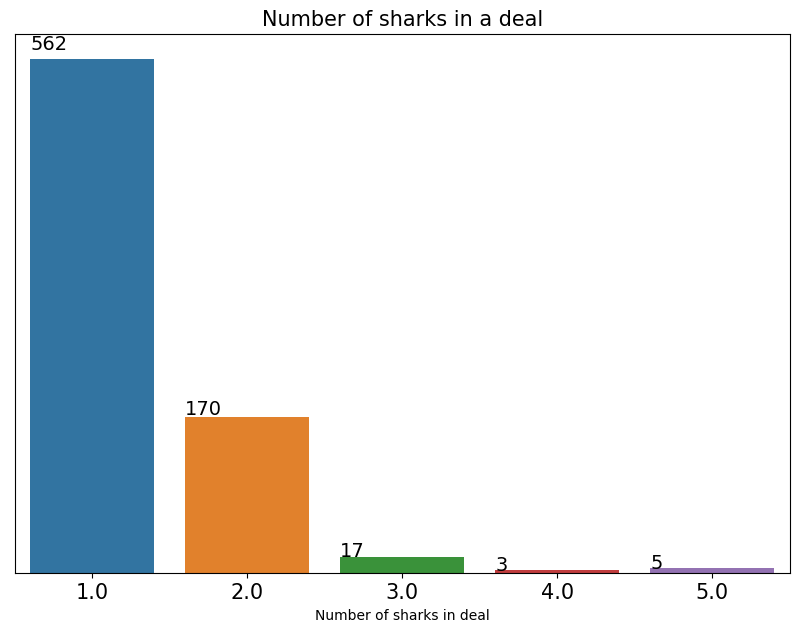

In [44]:
# Number of sharks in a deal
print(shark_tank['Number of sharks in deal'].value_counts(), "\n")

# In percentage
print(round(shark_tank['Number of sharks in deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

fig = plt.figure(figsize=(10, 7))
plt.title("Number of sharks in a deal", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([])
ax = sns.countplot(data = shark_tank, x = 'Number of sharks in deal')
ax.set_ylabel('')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02), size=14)

In [45]:
# All sharks deals
print(shark_tank.loc[shark_tank['Number of sharks in deal'] >= 5][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]])

     Season Number   Startup Name  Total Deal Amount  Total Deal Equity
6                1  ClassroomJams           250000.0              100.0
161              4      BuggyBeds           250000.0               25.0
268              5   Breathometer          1000000.0               30.0
514              7         XCraft          1500000.0               25.0
814             10    CupBoardPro           100000.0               20.0


In [46]:
# Sharks with most number of solo deals
amt_cols = shark_tank.columns[shark_tank.columns.str.contains(' Investment Amount')].tolist()
tmp = shark_tank.loc[shark_tank['Number of sharks in deal'] == 1][amt_cols]
tmp.count().sort_values(ascending=False).nlargest(3)

# Mark did more solo deals, than any other Shark

Mark Cuban Investment Amount          116
Lori Greiner Investment Amount        105
Barbara Corcoran Investment Amount     78
dtype: int64

In [47]:
# Top 25 US 🇺🇸 states of pitcher's
tmp = shark_tank['Pitchers State'].value_counts().nlargest(20).sort_values(ascending=True)
fig = px.bar(tmp, x="Pitchers State", title="<b>Top 20 States</b> from where pitchers came from", template='simple_white', text=tmp, width=850, height=750)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show()

In [48]:
# Top 20 cities
tmp = shark_tank['Pitchers City'].value_counts().nlargest(20).sort_values(ascending=True)
fig = px.bar(tmp, x="Pitchers City", title="<b>Top 20 cities</b> with number of startups came for pitching", template='simple_white', text=tmp, width=850, height=800)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show()

In [49]:
# Most frequently asked amount, by startups
shark_tank.groupby('Original Ask Amount').size().nlargest(10)

# Original Ask Amount (USD) and Number times asked

Original Ask Amount
100000    157
200000    134
150000    132
500000    130
250000    108
300000     98
50000      84
75000      50
400000     49
125000     29
dtype: int64

In [50]:
# Most frequently offered equity, by startups
shark_tank.groupby('Original Offered Equity').size().nlargest(10)

# Original Offered Equity (in %) and Number times offered

Original Offered Equity
10.0    400
20.0    221
5.0     174
15.0    156
25.0     72
30.0     32
8.0      29
7.0      18
12.0     15
6.0      14
dtype: int64

In [51]:
# Most frequently invested amount, by Sharks
shark_tank.groupby('Total Deal Amount').size().nlargest(10)

# Total Deal Amount (USD) and Number times invested

Total Deal Amount
100000.0    100
200000.0     85
150000.0     79
500000.0     69
300000.0     68
250000.0     65
50000.0      43
75000.0      29
400000.0     25
600000.0     19
dtype: int64

In [52]:
# Most frequently received total equity, by Sharks
shark_tank.groupby('Total Deal Equity').size().nlargest(10)

# Total Deal Equity (in %) and Number times invested

Total Deal Equity
20.0    125
25.0    118
10.0     72
15.0     68
30.0     67
40.0     35
50.0     34
5.0      25
33.0     23
35.0     22
dtype: int64

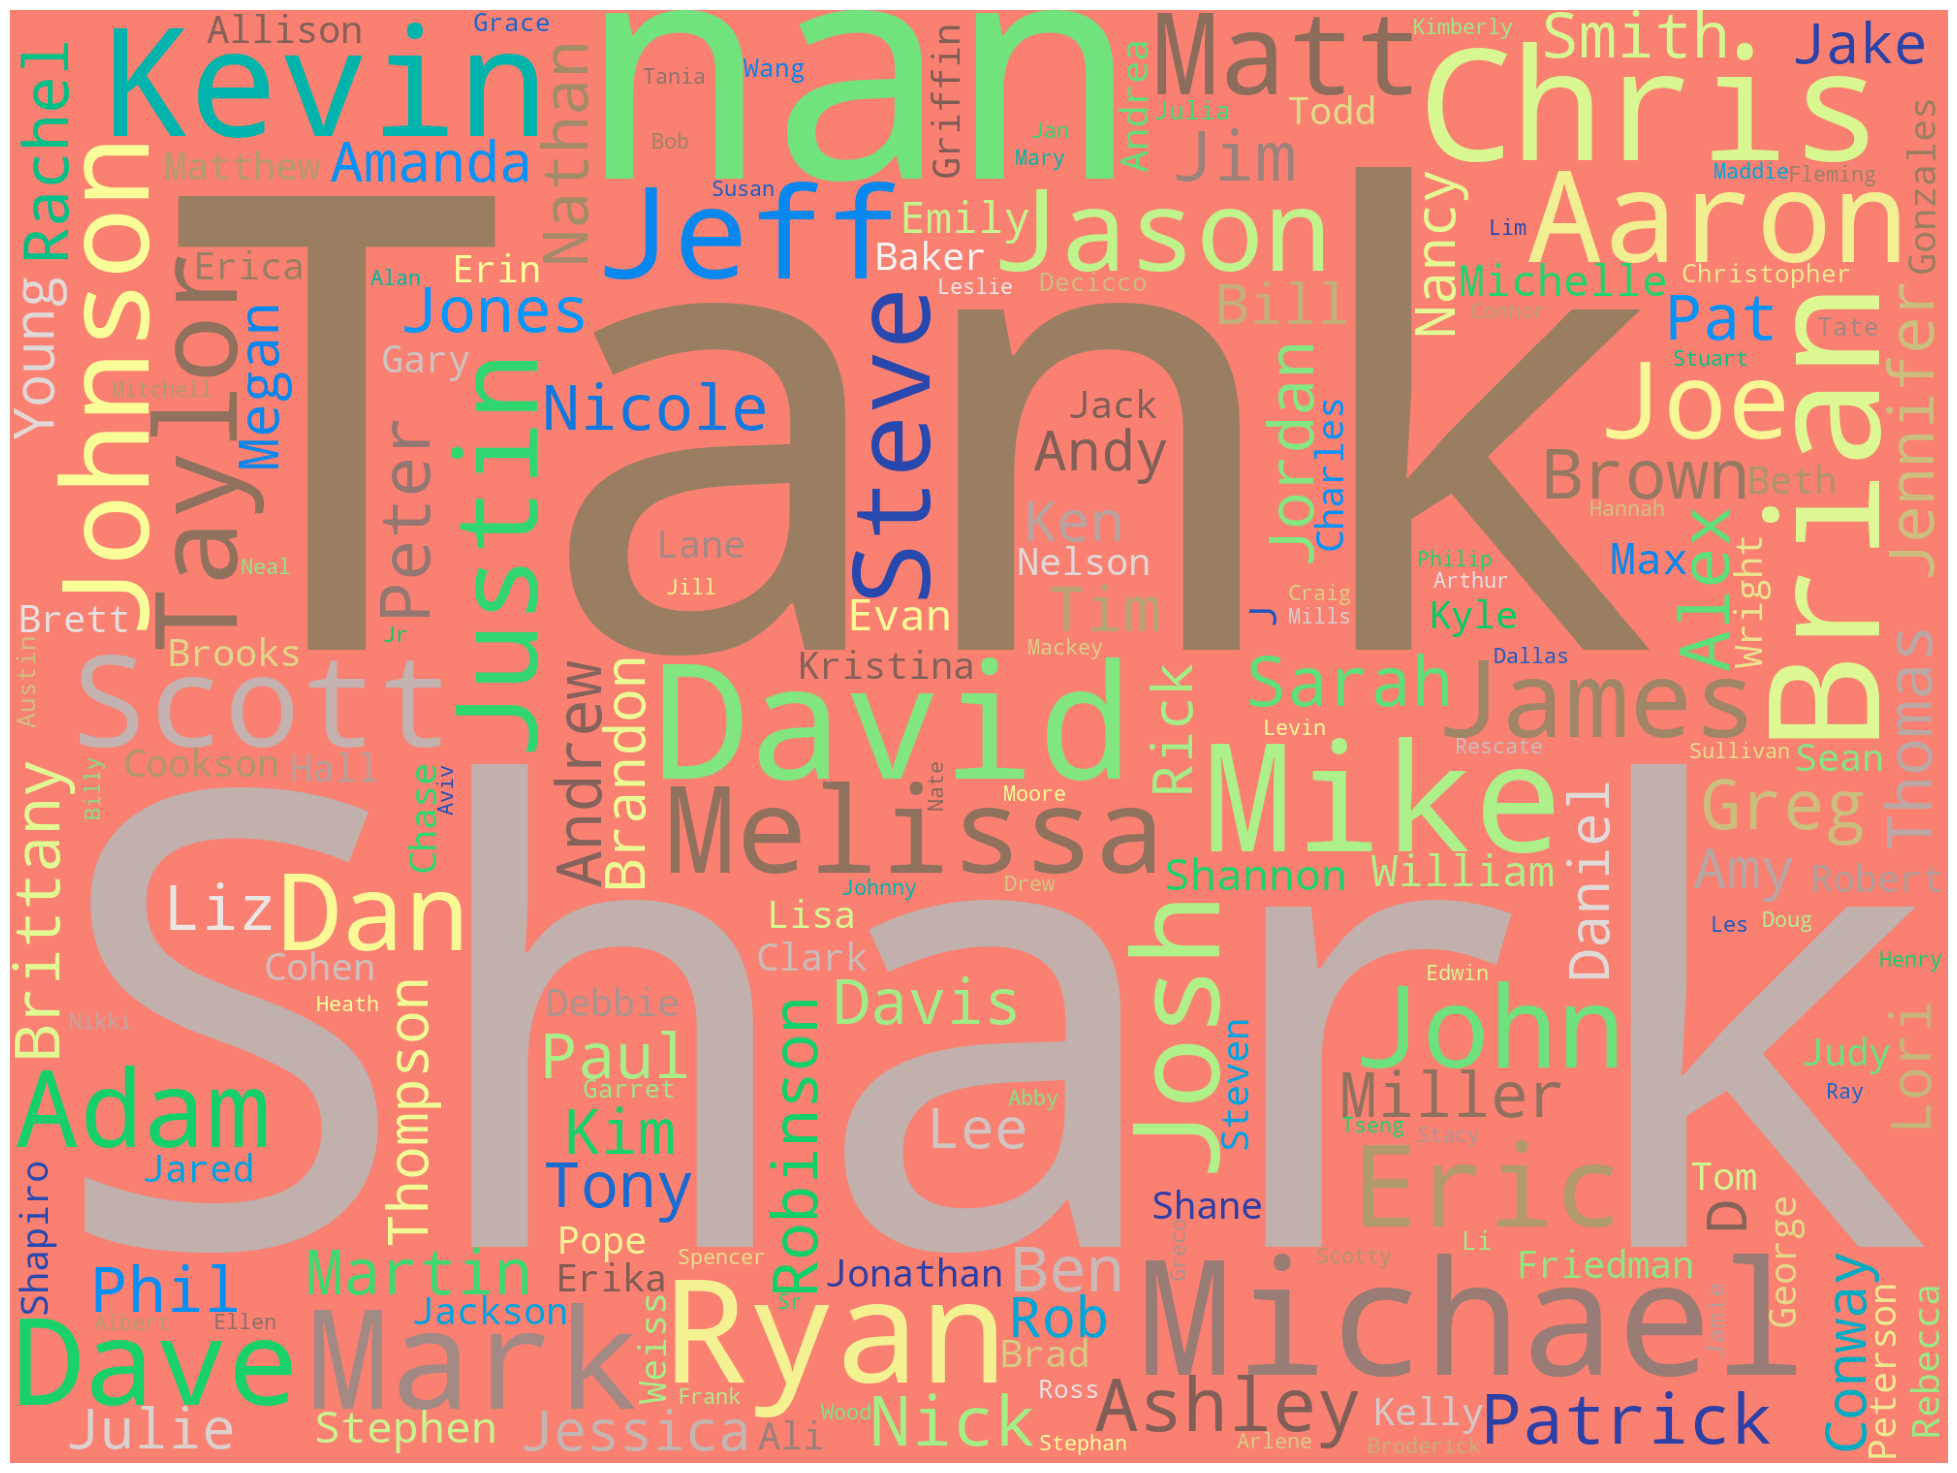

In [53]:
# Word cloud based on Pitcher name
text = " Shark Tank ".join(cat for cat in shark_tank['Entrepreneur Names'].astype(str))
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='salmon', colormap='terrain_r', collocations=False, random_state=2023).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [54]:
# Many (100+) companies got more amount than they asked/expected
shark_tank.loc[shark_tank['Original Ask Amount'] < shark_tank["Total Deal Amount"]][["Season Number","Startup Name","Original Ask Amount","Total Deal Amount"]]

Season Number    Startup Name  Original Ask Amount  Total Deal Amount
15                1  GiftCardRescue               150000           200000.0
30                1   Soy-Yer-Dough               125000           300000.0
43                1     JumpForward               150000           600000.0
64                2    WurkinStiffs                85000           100000.0
65                2       TippiToes                30000           100000.0
...             ...             ...                  ...                ...
1193             14      TheWoobles               250000           450000.0
1208             14      Collars&Co               300000          1000000.0
1209             14          Wondry               185000           225000.0
1212             14     LegacyShave               300000           700000.0
1256             14           Bleni               250000           750000.0

[125 rows x 4 columns]

In [55]:
# Most of the companies diluted/gave their company equity more than they initially offered/expected
shark_tank.loc[shark_tank['Original Offered Equity'] < shark_tank["Total Deal Equity"]][["Season Number","Startup Name","Original Offered Equity","Total Deal Equity"]]

Season Number        Startup Name  Original Offered Equity  \
0                 1      AvaTheElephant                     15.0   
1                 1  Mr.Tod'sPieFactory                     10.0   
5                 1        APerfectPear                     15.0   
6                 1       ClassroomJams                     10.0   
10                1         TurboBaster                     35.0   
...             ...                 ...                      ...   
1256             14               Bleni                      6.0   
1257             14  TheIceCreamCanteen                      5.0   
1258             14        PartingStone                      5.0   
1259             14             Milkify                     10.0   
1260             14              Cincha                     15.0   

      Total Deal Equity  
0                  55.0  
1                  50.0  
5                  50.0  
6                 100.0  
10                100.0  
...                 ...  
1256               35.0  
1257               20.0  
1258               10.0  
1259               20.0  
1260               25.0  

[644 rows x 4 columns]

In [56]:
# Below companies got the same valuation they requested (with or without loan)
shark_tank.loc[shark_tank['Valuation Requested'] == shark_tank["Deal Valuation"]][["Season Number","Startup Name","Valuation Requested","Deal Valuation"]]

Season Number       Startup Name  Valuation Requested  Deal Valuation
51                1  GreaseMonkeyWipes               100000        100000.0
60                1             Qubits               176471        176471.0
78                2    Ride-OnCarry-On               200000        200000.0
85                2         DaisyCakes               200000        200000.0
92                2             HyConn              1250000       1250000.0
...             ...                ...                  ...             ...
1164             13          SwiftPaws              4000000       4000000.0
1173             13           HandyPan               500000        500000.0
1198             14              Woosh              5000000       5000000.0
1216             14         ShredSkinz               300000        300000.0
1218             14            ChessUp              6000000       6000000.0

[99 rows x 4 columns]

In [57]:
# There are companies which got more valuation than they pitched
shark_tank.loc[shark_tank['Valuation Requested'] < shark_tank["Deal Valuation"]][["Season Number","Startup Name","Valuation Requested","Deal Valuation"]]

Season Number              Startup Name  Valuation Requested  \
30                1             Soy-Yer-Dough               500000   
31                1            GrillCharmsSet               200000   
77                2            HillbillyBrand               200000   
84                2                 SweepEasy               160000   
104               3     IWantToDrawACatForYou                40000   
112               3               WineBalloon               133333   
113               3                    ShowNo               200000   
149               3             BootIllusions               333333   
232               4              Lose12Inches               480000   
268               5              Breathometer              2500000   
276               5                 Hamboards               666667   
285               5                  FiberFix               900000   
323               5        TheCookieDoughCafe               250000   
324               5                Cycloramic              1800000   
336               5                RevoLights              1500000   
400               6          BeatBoxBeverages              2000000   
436               6                     Lumio              3125000   
444               6               DrainStrain               733333   
491               6                SharkWheel              2000000   
502               7                  Loliware              1500000   
514               7                    XCraft              2500000   
517               7               Windcatcher              2500000   
580               7                     Vengo             16000000   
582               7                Wondercide             10000000   
654               8             HandOutGloves               750000   
671               8                 Tranquilo              1000000   
675               8                   Toymail             10000000   
721               9                 IceShaker               666667   
744               9                 DNASimple               800000   
775               9                RounderBum              1500000   
788               9                   Radiate               250000   
829              10                  OatMeals              2500000   
831              10                  PopItPal              2500000   
845              10          MakeupJunkieBags              1333333   
852              10                   SubSafe               384615   
912              11                  MyoStorm              1500000   
925              11  Mrs.Goldfarb'sUnrealDeli              1000000   
935              11             KreylEssence              4000000   
1045             12              ByootCompany               166667   
1066             12                    Phoozy              5000000   
1150             13                   Ade+Ayo              1750000   
1151             13                   Sunflow             16666667   
1176             13           KawaiiLightning               400000   
1193             14                TheWoobles              5000000   
1208             14                Collars&Co              7500000   

      Deal Valuation  
30          588235.0  
31          250000.0  
77          300000.0  
84          227273.0  
104          75758.0  
112         400000.0  
113         300000.0  
149        1250000.0  
232         500000.0  
268        3333333.0  
276        1000000.0  
285        2083333.0  
323         333333.0  
324        3333333.0  
336        3000000.0  
400        3030303.0  
436        3500000.0  
444        1100000.0  
491        3000000.0  
502        2400000.0  
514        6000000.0  
517        4000000.0  
580       20000000.0  
582       16666667.0  
654        1200000.0  
671        1333333.0  
675       12000000.0  
721        1000000.0  
744        1333333.0  
775        3000000.0  
788         400000.0  
829       15000000.0  
831        5000000.0  
845

In [58]:
# Episodes which got most TRP
print("Maximum viewership in US:", shark_tank['US Viewership'].max(), "\n")
print(shark_tank.loc[shark_tank['US Viewership']>=shark_tank['US Viewership'].max()-0.4][["Season Number","Episode Number","Startup Name","US Viewership"]].head(18).sort_values("US Viewership",ascending=False).to_string(index=False))

Maximum viewership in US: 8.64 

 Season Number  Episode Number    Startup Name  US Viewership
             6              15        TurboPUP           8.64
             6              15           Lumio           8.64
             6              15      BelloVerde           8.64
             6              15         Napwell           8.64
             6              20        LuminAid           8.43
             6              20         Scholly           8.43
             6              20        KeenHome           8.43
             6              20    TaalumaTotes           8.43
             5              27       Angellift           8.33
             5              27        HangEase           8.33
             5              27 TheBouqsCompany           8.33
             5              27      SustyParty           8.33
             5              21   PackbackBooks           8.29
             5              21          Chapul           8.29
             5              21  Garag

In [59]:
# Episodes which got least TRP
print("Minimum viewership in United States:", shark_tank['US Viewership'].min(), "\n")
print(shark_tank.loc[shark_tank['US Viewership']<=shark_tank['US Viewership'].min()+0.3][["Season Number","Episode Number","Startup Name","US Viewership"]].head(18).sort_values("US Viewership").to_string(index=False))

Minimum viewership in United States: 2.27 

 Season Number  Episode Number    Startup Name  US Viewership
            11              23          Salted           2.27
            11              23       MCSquares           2.27
            11              23           Slate           2.27
            11              23     RescueReady           2.27
            12               4      JadaSpices           2.31
            12               4    SurpriseCake           2.31
            12               4 TheMightyCarver           2.31
            12               4        Flipstik           2.31
            11              21          Proven           2.39
            11              21         Tanoshi           2.39
            11              21      UnbuckleMe           2.39
            11              21     VanRobotics           2.39


0    458
1    364
Name: Multiple Entrepreneurs, dtype: Int64 

0    56%
1    44%
Name: Multiple Entrepreneurs, dtype: object


<AxesSubplot:ylabel='Multiple Entrepreneurs'>

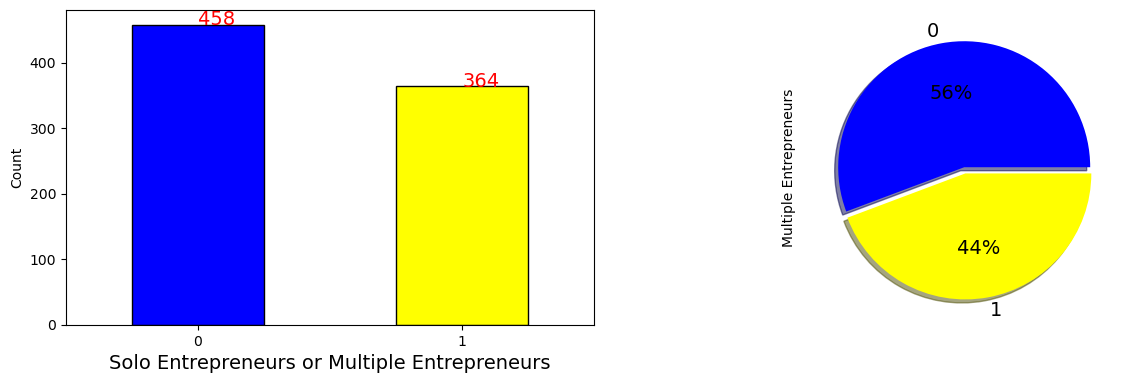

In [60]:
# Solo or multiple Entrepreneurs ?
print(shark_tank['Multiple Entrepreneurs'].value_counts(), "\n")
print(round(shark_tank['Multiple Entrepreneurs'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15,9))
ax1 = plt.subplot(221)
shark_tank["Multiple Entrepreneurs"].value_counts().plot(kind='bar', color=["blue","yellow"], ec="k")
plt.xlabel("Solo Entrepreneurs or Multiple Entrepreneurs", size=14)
plt.ylabel("Count")
plt.xticks(rotation=0)
for x,y in enumerate(shark_tank["Multiple Entrepreneurs"].value_counts()):
    plt.annotate(y, (x,y), fontsize=14, color="red")
    
ax2 = plt.subplot(222)
shark_tank["Multiple Entrepreneurs"].value_counts().plot(kind='pie', autopct='%.0f%%', explode = (0,0.05), colors=["blue","yellow"], shadow=True, fontsize=14)

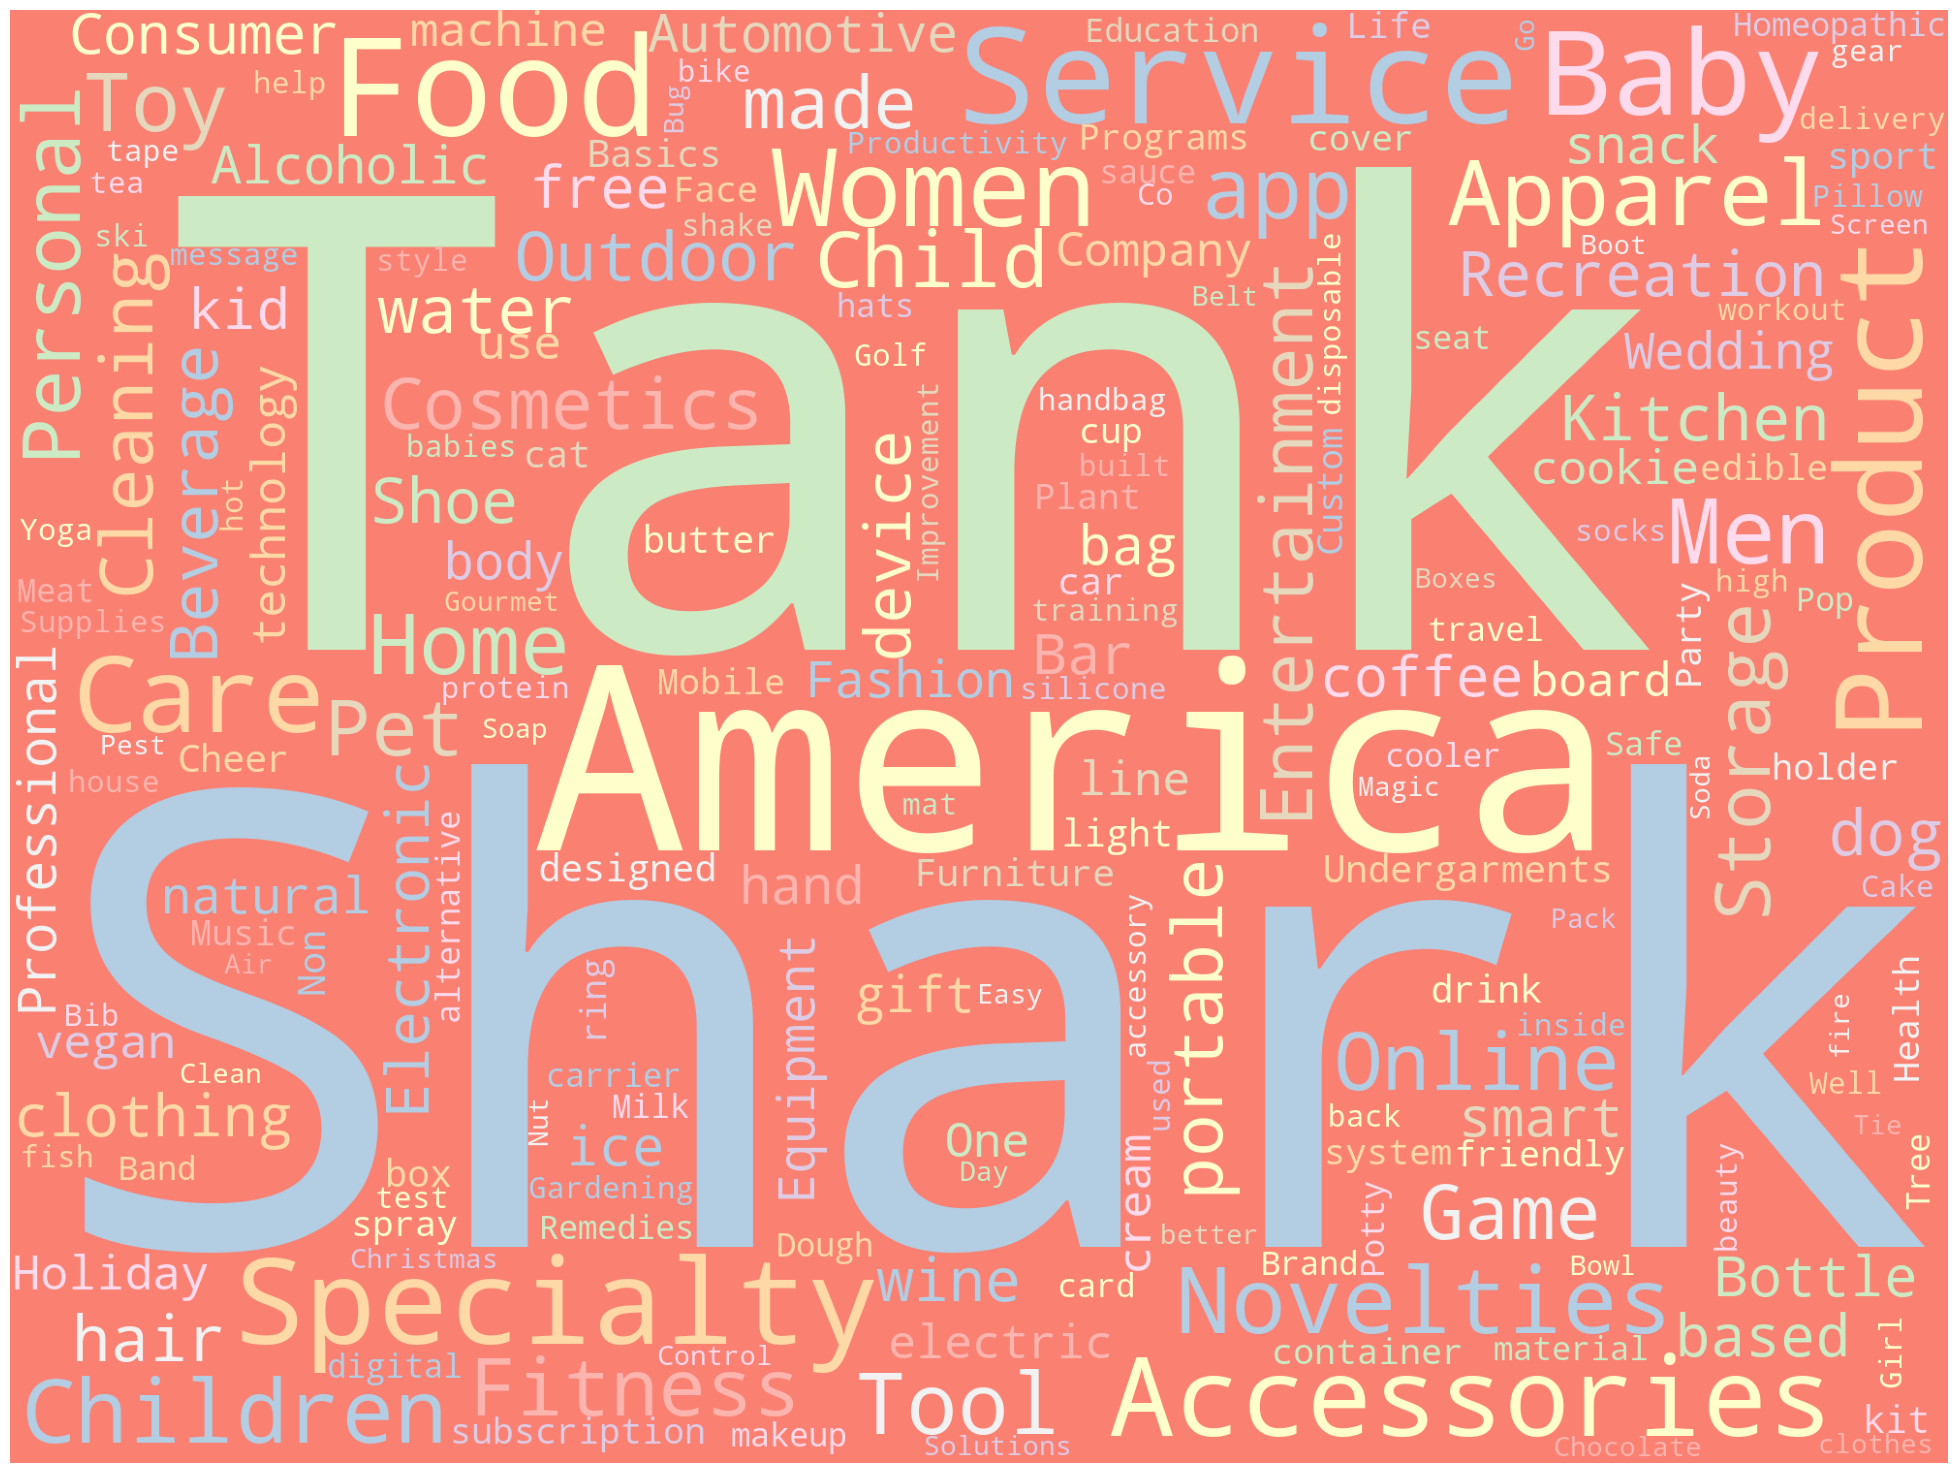

In [61]:
# Word cloud based on Business Description
text = " Shark Tank America ".join(cat for cat in shark_tank['Business Description'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='salmon', colormap='Pastel1', collocations=False, random_state=2023).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [62]:
# Correlation matrix
shark_tank.corr().style.background_gradient(cmap = 'Blues')

In [63]:
print("numpy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
import matplotlib
print("matplotlib version: {}". format(matplotlib. __version__))
print("seaborn version: {}". format(sns.__version__))
import plotly
print("plotly version: {}". format(plotly.__version__))

# Current versions
# numpy version: 1.21.6
# pandas version: 1.3.5
# matplotlib version: 3.5.3
# seaborn version: 0.12.2
# plotly version: 5.13.0

numpy version: 1.21.6
pandas version: 1.3.5
matplotlib version: 3.5.3
seaborn version: 0.12.2
plotly version: 5.13.0


## Data set values verification (you can ignore below section)
##### below queries should not return any rows

In [64]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Total Deal Amount'].isnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [65]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Total Deal Equity'].isnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [66]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Deal Valuation'].isnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [67]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Number of sharks in deal'].isnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [68]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Investment Amount Per Shark'].isnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [69]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Equity Per Shark'].isnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [70]:
shark_tank.loc[round(shark_tank['Total Deal Amount'].fillna(0),1) != round(shark_tank['Barbara Corcoran Investment Amount'].fillna(0) + shark_tank['Mark Cuban Investment Amount'].fillna(0) + shark_tank['Lori Greiner Investment Amount'].fillna(0) + shark_tank['Robert Herjavec Investment Amount'].fillna(0) + shark_tank['Daymond John Investment Amount'].fillna(0) + shark_tank['Kevin O Leary Investment Amount'].fillna(0) + shark_tank['Guest Investment Amount'].fillna(0), 1)]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [71]:
shark_tank.loc[round(shark_tank['Total Deal Equity'].fillna(0),1) != round(shark_tank['Barbara Corcoran Investment Equity'].fillna(0) + shark_tank['Mark Cuban Investment Equity'].fillna(0) + shark_tank['Lori Greiner Investment Equity'].fillna(0) + shark_tank['Robert Herjavec Investment Equity'].fillna(0) + shark_tank['Daymond John Investment Equity'].fillna(0) + shark_tank['Kevin O Leary Investment Equity'].fillna(0) + shark_tank['Guest Investment Equity'].fillna(0), 1)]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [72]:
shark_tank.loc[(shark_tank['Guest Investment Amount'].notnull()) & (shark_tank['Guest Name'].isnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [73]:
shark_tank.loc[(shark_tank['Guest Investment Amount'].isnull()) & (shark_tank['Guest Name'].notnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [74]:
shark_tank.loc[(shark_tank['Multiple Entrepreneurs'] != 0) & (shark_tank['Multiple Entrepreneurs'] != 1)]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [75]:
shark_tank.loc[(shark_tank['Multiple Entrepreneurs'] == 0) & (shark_tank['Entrepreneur Names'].notnull() & shark_tank['Entrepreneur Names'].str.contains(' and'))]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [76]:
shark_tank.loc[(shark_tank['Multiple Entrepreneurs'] == 1) & (shark_tank['Entrepreneur Names'].str.contains(' and ')==False)]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [77]:
shark_tank.loc[(shark_tank['Got Deal'] != 0) & (shark_tank['Got Deal'] != 1)]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [78]:
shark_tank.loc[(shark_tank['Got Deal'] == 0) & (shark_tank['Total Deal Amount'].notnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [79]:
shark_tank.loc[(shark_tank['Pitchers Gender'] == 'Mixed Team') & (shark_tank['Multiple Entrepreneurs'] != 1)]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [80]:
shark_tank.loc[(shark_tank['Got Deal'] == 0) & (shark_tank['Guest Name'].notnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [81]:
shark_tank.loc[shark_tank['Total Deal Amount'] < shark_tank["Loan"]]

Season Number Season Start Season End  Episode Number  Pitch Number  \
291              5    20-Sep-13  16-May-14               8           292   
974             11    29-Sep-19  15-May-20              20           975   

    Original Air Date        Startup Name           Industry  \
291         08-Nov-13  PaparazziProposals     Lifestyle/Home   
974         01-May-20        MuralPainter  Business Services   

                    Business Description Pitchers Gender Pitchers City  \
291       Paparazzi Proposals - Weddings            Male      New York   
974  Hand-painted signs and promo agency          Female        Queens   

    Pitchers State Pitchers Average Age Entrepreneur Names  \
291             NY               Middle       James Ambler   
974             NY               Middle      Emily Strauss   

                        Company Website  Multiple Entrepreneurs  \
291  http://www.paparazzi-proposals.com                       0   
974                                 NaN                       0   

     US Viewership  Original Ask Amount  Original Offered Equity  \
291           7.32               250000                     20.0   
974           4.82               300000                     15.0   

     Valuation Requested  Got Deal  Total Deal Amount  Total Deal Equity  \
291              1250000         1            50000.0               33.0   
974              2000000         1           100000.0               15.0   

     Deal Valuation  Number of sharks in deal  ...  Equity Per Shark  \
291        757576.0                       2.0  ...              16.5   
974        666667.0                       1.0  ...              15.0   

     Royalty Deal      Loan  Barbara Corcoran Investment Amount  \
291           NaN  200000.0                                 NaN   
974           NaN  200000.0                            100000.0   

     Barbara Corcoran Investment Equity  Mark Cuban Investment Amount  \
291                                 NaN                           NaN   
974                                15.0                           NaN   

     Mark Cuban Investment Equity  Lori Greiner Investment Amount  \
291                           NaN                         25000.0   
974                           NaN                             NaN   

     Lori Greiner Investment Equity  Robert Herjavec Investment Amount  \
291                            16.5                                NaN   
974                             NaN                                NaN   

     Robert Herjavec Investment Equity  Daymond John Investment Amount  \
291                                NaN                             NaN   
974                                NaN                             NaN   

     Daymond John Investment Equity  Kevin O Leary Investment Amount  \
291                             NaN                          25000.0   
974                             NaN                              NaN   

     Kevin O Leary Investment Equity  Guest Investment Amount  \
291                             16.5                      NaN   
974                              NaN                      NaN   

     Guest Investment Equity  Guest Name Barbara Corcoran Present  \
291                      NaN         NaN                      1.0   
974                      NaN         NaN                      NaN   

     Mark Cuban Present  Lori Greiner Present  Robert Herjavec Present  \
291                 1.0                   1.0                      1.0   
974                 NaN                   NaN                      NaN   

     Daymond John Present  Kevin O Leary Present  Total Deal Amount in M  
291                   0.0                    1.0                    0.05  
974                   NaN                    NaN                    0.10  

[2 rows x 51 columns]